# cv2学习笔记5
## 检测轮廓
### 检测不规则轮廓cv2.findContours
1.  cv2.findContours(image, mode, method[, contours[, hierarchy[, offset ]]])  
    - 三个参数：
      1. 寻找轮廓的图像(必须为二值图，即黑白的（不是灰度图），所以读取的图像要先转成灰度的，再转成二值图)
      2. 轮廓的检索模式，有四种：
  <br/>cv2.RETR_EXTERNAL表示只检测外轮廓
  <br/>cv2.RETR_LIST检测的轮廓不建立等级关系
  <br/>cv2.RETR_CCOMP建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层
  <br/>cv2.RETR_TREE建立一个等级树结构的轮廓
      3. 轮廓的近似办法有3种：
  <br/>cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
  <br/>cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
  <br/>cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法

    - 三个返回值：修改后的图像、图像的轮廓以及它们的层次。使用轮廓来画出图像的彩色版本（即把轮廓画成绿色），并显示出来。
    <br/>
2. cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset ]]]]])  
    - 同样会修改图片
    - 五个参数：
       1. 图片
       2. 轮廓，在Python中是一个list
       3. 指定绘制轮廓list中的哪条轮廓,-1则表示所有轮廓，
       4. 画笔颜色：(0, 255, 0)（即Green）
       5. 画笔粗细


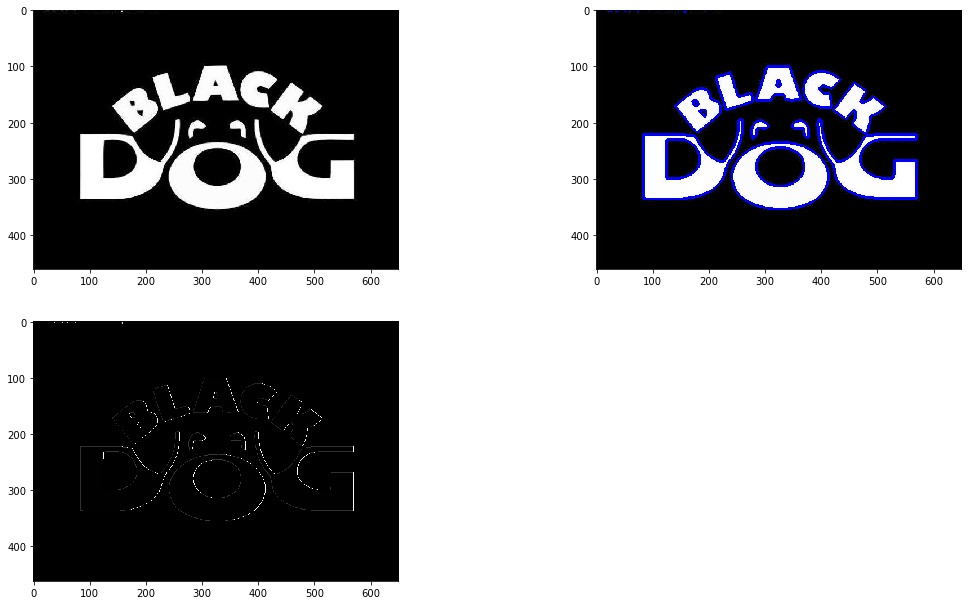

In [1]:
import cv2  
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/situ.st.1/Pictures/heibai.jpg')  
img1 = img.copy() #cv2.findContours会改变图像，可先保存原图副本
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)  
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  #转为黑白图
#cv2.imshow("binary", binary)  

image,contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(img1,contours,-1,(0,0,255),3)  
  
#cv2.imshow("img", img1)  
#cv2.imshow("binary1", binary)  
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.figure(figsize=(18.5,10.5))
plt.subplot(221),plt.imshow(img, 'gray') 
plt.subplot(222),plt.imshow(img1, 'gray') 
plt.subplot(223),plt.imshow(binary, 'gray') 
plt.show() #显示出来，不要也可以，但是一般都要了

#还能获取其他细节信息
cnt = contours[0]# 取第 0 个轮廓
area = cv2.contourArea(cnt)# 轮廓面积
perimeter = cv2.arcLength(cnt, True)# 周长，或者说，弧长；第二个参数的True表示该轮廓是否封闭

### 检测直线
#### 绘制直线
- cv2.line（img,Point pt1,Point pt2,color,thickness=1,line_type=8 shift=0） 参数说明：
  - 图像 
  - 起点坐标
  - 终点坐标
  - 颜色
  - 线的粗细

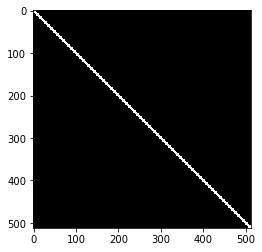

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = np.zeros((512,512),np.uint8)#生成一个空灰度图像
cv2.line(img,(0,0),(511,511),255,5)
plt.imshow(img,'gray')
plt.show()


#### 霍夫变换
   霍夫变换是图像变换中的经典手段之一，主要用来从图像中分离出具有某种相同特征的几何形状（如，直线，圆等）。霍夫变换寻找直线与圆的方法相比与其它方法可以更好的减少噪声干扰。经典的霍夫变换常用来检测直线，圆，椭圆等。
   <br/>[霍夫变换原理](http://www.opencv.org.cn/opencvdoc/2.3.2/html/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html/).
   <br/>
   cv2.HoughLines函数有四个参数：
   1. 一幅含有点集的二值图，其中一些点互相联系组成直线。通常这是通过如Canny算子获得的一幅边缘图像。
   2. 二三参数分别是ρ和θ的精确度，可以理解为步长
   3. 第四个参数为阈值T
   cv2.HoughLines函数输出：[float, float]形式的ndarray，其中每个值表示检测到的线(ρ , θ)中浮点点值的参数，其中ρ的单位是像素长度（也就是直线到图像原点(0,0)点的距离），而θ的单位是弧度。

In [ ]:
import cv2  
import numpy as np    
  
img = cv2.imread("C:/Users/situ.st.1/Pictures/qipan.jpg", 0)  
img = cv2.GaussianBlur(img,(3,3),0)  
edges = cv2.Canny(img, 50, 150, apertureSize = 3)  
lines = cv2.HoughLines(edges,0,np.pi/180,200) #输出的是直线的极坐标
result = img.copy() 
for rho,theta in lines[0]:#把极坐标转化为直角坐标
    print rho
    print theta
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),3)
cv2.imshow('Canny', edges )  
cv2.imshow('Result', result)  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

#### 霍夫概率变换
    一种概率直线检测，霍夫直线检测的改进版。原理上讲hough变换是一个耗时耗力的算法，尤其是每一个点计算，即使经过了canny转换了有的时候点的个数依然是庞大的，若采取一种概率挑选机制，随机的选取一些个点来计算，相当于降采样了。
    参数输入多了两个参数：
    1. minLineLengh(线的最短长度，比这个短的都被忽略，经验取值200)
    2. MaxLineCap（两条直线之间的最大间隔，小于此值，认为是一条直线，经验取值15）。     
    函数输出的直接就是直线点的坐标位置，这样可以省去一系列for循环中的由参数空间到图像的实际坐标点的转换。

In [ ]:
import cv2  
import numpy as np    
  
img = cv2.imread("C:/Users/situ.st.1/Pictures/棋盘.jpg")  
  
img = cv2.GaussianBlur(img,(3,3),0)  
edges = cv2.Canny(img, 50, 150, apertureSize = 3)  
lines = cv2.HoughLines(edges,1,np.pi/180,118)  
result = img.copy()  
  
#经验参数  
minLineLength = 200  
maxLineGap = 15  
lines = cv2.HoughLinesP(edges,1,np.pi/180,80,minLineLength,maxLineGap)  
for x1,y1,x2,y2 in lines[0]:  
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)  
  
cv2.imshow('Result', img)  
cv2.waitKey(0)  
cv2.destroyAllWindows() 

### 矩形检测
#### 绘制矩形
cv2.rectangle(img,(380,0),(511,111),(255,0,0),3)，需要确定的就是矩形的两个点（左上角与右下角），颜色，线宽（不设置就默认）


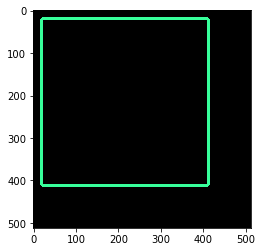

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros((512,512,3),np.uint8)  #生成一个空彩色图像
cv2.rectangle(img,(20,20),(411,411),(55,255,155),5)
plt.imshow(img)
plt.show()


### 圆形检测
#### 绘制圆形
cv2.circle(img,(447,63), 63, (0,0,255), -1) 五个参数，图片名称、圆心坐标、半径、颜色数组、线宽（线宽为-1对封闭图形来说是内部填满）


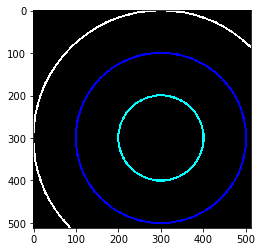

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = np.zeros((512,512,3),np.uint8)  #生成一个空彩色图像
cv2.circle(img,(300,300), 300, (255,255,255), 3) 
cv2.circle(img,(300,300), 200, (0,0,255), 3)  
cv2.circle(img,(300,300), 100, (0,255,255), 3) 
plt.imshow(img)
plt.show()

#### 检测圆形
cv2.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius) 
参数说明：
1. 输入为灰度图像
2. 检测方法，cv2.HOUGH_GRADIENT
3. dp累加器图像的分辨率。这个参数允许创建一个比输入图像分辨率低的累加器。（这样做是因为有理由认为图像中存在的圆会自然降低到与图像宽高相同数量的范畴）。如果dp设置为1，则分辨率是相同的；如果设置为更大的值（比如2），累加器的分辨率受此影响会变小（此情况下为一半）。dp的值不能比1小。
4. minDist是让算法能明显区分的两个不同圆之间的最小距离。
5. param1用于Canny的边缘阀值上限，下限被置为上限的一半,值越大，识别的圆越多
6. param2累加器的阀值。
7. 同时最好规定检测的圆的最大最小半径，不能盲目的检测，否侧浪费时间空间。

返回值：三维数组（x,y,r），x,y确定圆心，r确定半径

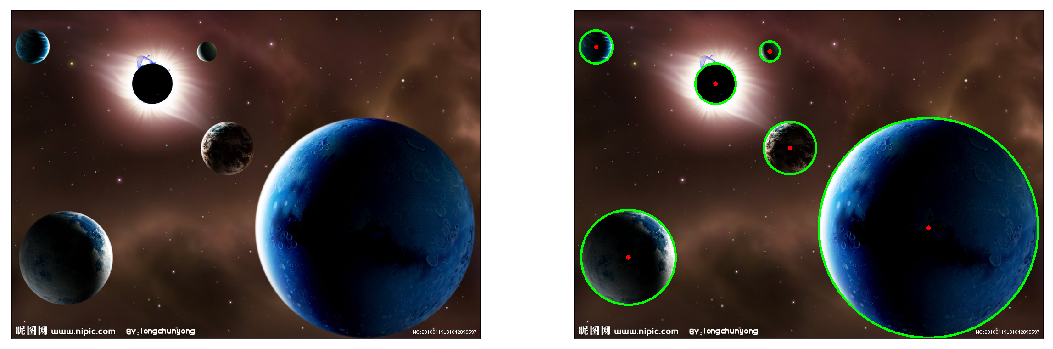

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

planets = cv2.imread("C:/Users/situ.st.1/Pictures/starball.jpg")
plt.figure(figsize = (18.5,10.5))
plt.subplot(121),plt.imshow(planets,"gray")
plt.xticks([]),plt.yticks([])

gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 120, param1=150, param2 = 30, minRadius = 0,  maxRadius = 0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(planets, (i[0], i[1]), i[2],(0, 255, 0),3) #绿色的圆轮廓
    cv2.circle(planets, (i[0], i[1]), 2, (255, 0,0), 5)  #红色的圆心

plt.subplot(122),plt.imshow(planets)
plt.xticks([]),plt.yticks([])
plt.show()
#cv2.imshow("HoughCircles", planets)
#cv2.waitKey()
#cv2.destroyAllWindows()

### 寻找最小矩形、最小闭圆的轮廓

- cv2.pyrDown()一个高分辨率大尺寸的图像向上构建一个金字塔（尺寸变小，分辨率降低）。它有三个参数：
  - tmp: 当前图像，初始化为原图像 src 。
  - dst: 目的图像( 显示图像，为输入图像的一半)
  - Size( tmp.cols/2, tmp.rows/2 ) :目的图像大小， 如果是向下采样，默认情况下直接输入需要操作的图像即可，他会把图像按缩小1/4的来处理
- 函数 cv2.pyrUp() 从一个低分辨率小尺寸的图像向下构建一个金子塔（尺寸变大，但分辨率不会)。虽然变大了，但是图像并不能恢复成以前的样子，也就是分辨率上不能达到以前的那种效果（仅仅是变大了而已）


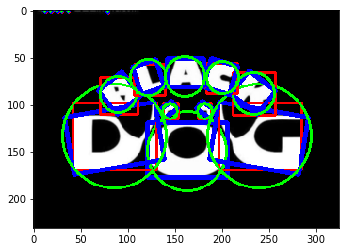

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.pyrDown(cv2.imread('C:/Users/situ.st.1/Pictures/heibai.jpg', cv2.IMREAD_UNCHANGED))
ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
image, contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # 直边矩形-----------------------------------------------------------------------------
    x, y, w, h = cv2.boundingRect(c)   # 将轮廓信息转换成(x, y)坐标，并加上矩形的高度和宽度
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)  # 画出简单矩形，蓝色
    
    #旋转的边界矩形------------------------------------------------------------------------
    rect = cv2.minAreaRect(c)   # 计算包围目标的最小矩形区域
    box = cv2.boxPoints(rect) #计算坐标
    box =np.int0(box)
    # 注：OpenCV没有函数能直接从轮廓信息中计算出最小矩形顶点的坐标。所以需要计算出最小矩形区域，然后计算这个矩形的顶点。
    #由于计算出来的顶点坐标是浮点型，但是所得像素的坐标值是整数（不能获取像素的一部分），所以需要做一个转换
    cv2.drawContours(img, [box], 0, (0, 0, 255), 3)  # 画一个最小矩形，红色

    (x, y), radius = cv2.minEnclosingCircle(c)  #计算最小闭圆
    # 会返回一个二元组，第一个元素为圆心的坐标组成的元组，第二个元素为圆的半径值。
    center = (int(x), int(y)) #圆心
    radius = int(radius)      #半径
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)#画一个最小闭圆，绿色

#cv2.drawContours(img, contours, -1, (255, 0, 0), 3)#画轮廓，蓝色
#cv2.imshow("contours", img)
#cv2.waitKey()
#cv2.destroyAllWindows()
plt.imshow(img)
plt.show()

### 把旋转的矩形裁剪下来

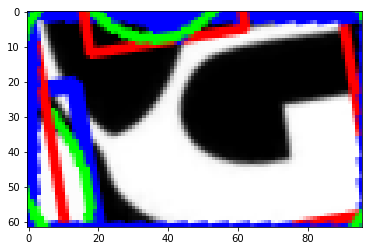

In [6]:
def rotateImage(image,rect):
    image_copy = image.copy()
    box = cv2.boxPoints(rect) #计算坐标
    box =np.int0(box)
    box = box[np.lexsort(box[:,::-1].T)]    
    degree = rect[2]
    if degree<-45:   #矩形向右转，取对角线坐标，即排序后box的中部
        degree = 90+degree
        pt1,pt2,pt4,pt3 = box
    else:            #矩形向左转，取对角线坐标，即排序后box的头和尾
        pt2,pt1,p3,pt4 = box
    height,width=image.shape[:2]
    heightNew = int(width * np.fabs(np.sin(np.radians(degree))) + height * np.fabs(np.cos(np.radians(degree))))
    widthNew = int(height * np.fabs(np.sin(np.radians(degree))) + width * np.fabs(np.cos(np.radians(degree))))
    matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)
    matRotation[0, 2] += (widthNew - width) / 2
    matRotation[1, 2] += (heightNew - height) / 2
    imgRotation = cv2.warpAffine(image_copy, matRotation, (widthNew, heightNew), borderValue=(255, 255, 255))
    pt2 = list(pt2)
    pt4 = list(pt4)
    [[pt2[0]], [pt2[1]]] = np.dot(matRotation, np.array([[pt2[0]], [pt2[1]], [1]]))
    [[pt4[0]], [pt4[1]]] = np.dot(matRotation, np.array([[pt4[0]], [pt4[1]], [1]]))
    imgOut=imgRotation[int(pt2[1]):int(pt4[1]),int(pt2[0]):int(pt4[0])]
    return imgOut

lencnt = [len(x) for x in contours]
maxi = np.argmax(lencnt)
rect = cv2.minAreaRect(contours[maxi]) 
imgOut=rotateImage(img,rect)
    
plt.imshow(imgOut)
plt.show()